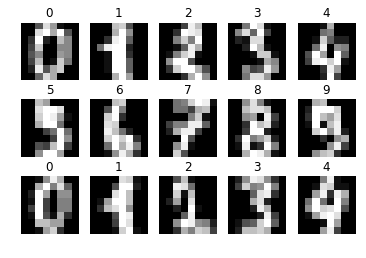

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

import matplotlib.pyplot as plt

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")
plt.show()

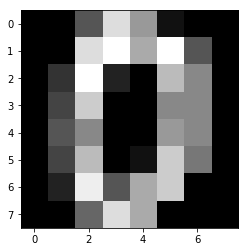

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9388888888888889


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [8]:
clf = joblib.load("digits.pkl")

In [10]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    clf = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img
    my_img = my_img.reshape((-1, 64))
    
    res = clf.predict(my_img)
    return res[0]

n = predict_digit("6.png")
print("6.png -> " + str(n))

n = predict_digit("9.png")
print("9.png -> " + str(n))

6.png -> 4
9.png -> 4
